In [54]:
import os
from scipy.io import arff 
import pandas as pd
import numpy as np
data = arff.loadarff('breast-cancer.arff') 
df = pd.DataFrame(data[0])
print("Original arff data:")
print(df.head())
# above we can see that we need to decode the last column
df['Class'] = df['Class'].str.decode("utf-8")
# strings are fine now
print("Data with fixed strings:") 
print(df.head())
# let's save this data frame in the CSV format
df.to_csv (r'/tmp/breast-cancer.csv', index=False, header=True)
print("The CSV file:")
os.system("head -n 5 /tmp/breast-cancer.csv")
# you can load the csv data easily
df = pd.read_csv("/tmp/breast-cancer.csv")
# preview the first 5 lines of the loaded data
print("Read from the CSV file:") 
print(df.head())

Original arff data:
    V1   V2   V3   V4   V5    V6   V7   V8   V9 Class
0  5.0  1.0  1.0  1.0  2.0   1.0  3.0  1.0  1.0  b'1'
1  5.0  4.0  4.0  5.0  7.0  10.0  3.0  2.0  1.0  b'1'
2  3.0  1.0  1.0  1.0  2.0   2.0  3.0  1.0  1.0  b'1'
3  6.0  8.0  8.0  1.0  3.0   4.0  3.0  7.0  1.0  b'1'
4  4.0  1.0  1.0  3.0  2.0   1.0  3.0  1.0  1.0  b'1'
Data with fixed strings:
    V1   V2   V3   V4   V5    V6   V7   V8   V9 Class
0  5.0  1.0  1.0  1.0  2.0   1.0  3.0  1.0  1.0     1
1  5.0  4.0  4.0  5.0  7.0  10.0  3.0  2.0  1.0     1
2  3.0  1.0  1.0  1.0  2.0   2.0  3.0  1.0  1.0     1
3  6.0  8.0  8.0  1.0  3.0   4.0  3.0  7.0  1.0     1
4  4.0  1.0  1.0  3.0  2.0   1.0  3.0  1.0  1.0     1
The CSV file:
V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
Read from the CSV file:
    V1   V2   V3   V4   V5    V6   V7   V8   V9  Class
0  5.0  1.0  1.0  1.0  2.0  

In [55]:
headers =  ["Clump Thickness", \
  "Uniformity of Cell Size",\
  "Uniformity of Cell Shape",\
  "Marginal Adhesion",\
  "Single Epithelial Cell Size",\
  "Bare Nuclei",\
  "Bland Chromatin",\
  "Normal Nucleoli",\
  "Mitoses", "Class"]
  
df.columns = headers
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,1
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,1
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,1
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,1
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...
694,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1
695,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1
696,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,2
697,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,2


In [56]:
# vanilla decision tree
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, validation_curve
from sklearn import tree
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(df.loc[:,df.columns!='Class'],df['Class'])

clf = tree.DecisionTreeClassifier()
scores = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)
print('Default Vanilla Decision Trees')
print(f'Train Score: {round(scores["train_score"].mean() * 100, 2)}')
print(f'Test Score: {round(scores["test_score"].mean() * 100, 2)}')


Default Vanilla Decision Trees
Train Score: 100.0
Test Score: 94.13


In [57]:
# max depth hyperparameter
max_depth_range = range(1,20,2)

for max_depth in max_depth_range:
  clf = tree.DecisionTreeClassifier(max_depth=max_depth)
  score = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)  
  print(f'Max Depth {max_depth} - Test Score:{ round(score["test_score"].mean() * 100, 2)}, Train Score:{round(score["train_score"].mean() * 100,2)}')  
  # max_depth_scores.append(score['test_score'].mean())

# print(scores['test_score'].mean())

Max Depth 1 - Test Score:90.99, Train Score:92.7
Max Depth 3 - Test Score:92.86, Train Score:96.31
Max Depth 5 - Test Score:95.14, Train Score:98.17
Max Depth 7 - Test Score:94.28, Train Score:99.51
Max Depth 9 - Test Score:94.28, Train Score:99.89
Max Depth 11 - Test Score:94.28, Train Score:100.0
Max Depth 13 - Test Score:94.57, Train Score:100.0
Max Depth 15 - Test Score:94.42, Train Score:100.0
Max Depth 17 - Test Score:94.28, Train Score:100.0
Max Depth 19 - Test Score:93.99, Train Score:100.0


In [58]:
# min_samples_split hyperparameter
min_samples_split = range(2,30,3)

for min_samples in min_samples_split:
  clf = tree.DecisionTreeClassifier(min_samples_split=min_samples)
  score = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)  
  print(f'Min Samples Split {min_samples} - Test Score:{ round(score["test_score"].mean() * 100, 2)}, Train Score:{round(score["train_score"].mean() * 100,2)}')  

Min Samples Split 2 - Test Score:93.99, Train Score:100.0
Min Samples Split 5 - Test Score:93.99, Train Score:98.97
Min Samples Split 8 - Test Score:93.56, Train Score:98.38
Min Samples Split 11 - Test Score:94.28, Train Score:98.0
Min Samples Split 14 - Test Score:93.57, Train Score:97.55
Min Samples Split 17 - Test Score:94.14, Train Score:97.25
Min Samples Split 20 - Test Score:94.0, Train Score:96.93
Min Samples Split 23 - Test Score:93.85, Train Score:96.53
Min Samples Split 26 - Test Score:93.71, Train Score:96.41
Min Samples Split 29 - Test Score:93.71, Train Score:96.31


In [59]:
# min_samples_leaf hyperparameter
min_samples_leaf = range(1,30,2)

for min_samples in min_samples_leaf:
  clf = tree.DecisionTreeClassifier(min_samples_leaf=min_samples)
  score = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)  
  print(f'Min Samples Leaf {min_samples} - Test Score:{ round(score["test_score"].mean() * 100, 2)}, Train Score:{round(score["train_score"].mean() * 100,2)}')  

Min Samples Leaf 1 - Test Score:93.7, Train Score:100.0
Min Samples Leaf 3 - Test Score:93.56, Train Score:98.08
Min Samples Leaf 5 - Test Score:94.28, Train Score:97.14
Min Samples Leaf 7 - Test Score:93.71, Train Score:96.63
Min Samples Leaf 9 - Test Score:93.14, Train Score:95.99
Min Samples Leaf 11 - Test Score:93.28, Train Score:95.72
Min Samples Leaf 13 - Test Score:94.43, Train Score:95.53
Min Samples Leaf 15 - Test Score:93.86, Train Score:95.37
Min Samples Leaf 17 - Test Score:93.99, Train Score:95.17
Min Samples Leaf 19 - Test Score:94.14, Train Score:95.23
Min Samples Leaf 21 - Test Score:94.57, Train Score:95.04
Min Samples Leaf 23 - Test Score:94.0, Train Score:94.6
Min Samples Leaf 25 - Test Score:93.85, Train Score:94.48
Min Samples Leaf 27 - Test Score:93.85, Train Score:94.52
Min Samples Leaf 29 - Test Score:93.42, Train Score:94.39


In [60]:
# ccp_alpha hyperparameter
ccp_alpha = nrange = np.arange(0.0,0.06, 0.005)

for alpha in ccp_alpha:
  clf = tree.DecisionTreeClassifier(ccp_alpha=alpha)
  score = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)  
  print(f'Ccp Alpha {alpha} - Test Score:{ round(score["test_score"].mean() * 100, 2)}, Train Score:{round(score["train_score"].mean() * 100,2)}')  

Ccp Alpha 0.0 - Test Score:94.42, Train Score:100.0
Ccp Alpha 0.005 - Test Score:94.0, Train Score:96.82
Ccp Alpha 0.01 - Test Score:93.86, Train Score:95.76
Ccp Alpha 0.015 - Test Score:93.57, Train Score:95.39
Ccp Alpha 0.02 - Test Score:93.14, Train Score:94.75
Ccp Alpha 0.025 - Test Score:92.14, Train Score:94.36
Ccp Alpha 0.03 - Test Score:92.28, Train Score:94.09
Ccp Alpha 0.035 - Test Score:92.28, Train Score:93.67
Ccp Alpha 0.04 - Test Score:92.28, Train Score:93.67
Ccp Alpha 0.045 - Test Score:92.28, Train Score:93.67
Ccp Alpha 0.05 - Test Score:91.28, Train Score:93.23
Ccp Alpha 0.055 - Test Score:90.99, Train Score:92.7


In [61]:
# hyperparameter combination
clf = tree.DecisionTreeClassifier(ccp_alpha = 0.0, min_samples_leaf=1, min_samples_split=2, max_depth=5)
scores = cross_validate(clf, df.loc[:,df.columns!='Class'],df['Class'], cv=10, return_train_score=True)
print('Hyperparameter combination')
print(f'Train Score: {round(scores["train_score"].mean() * 100, 2)}')
print(f'Test Score: {round(scores["test_score"].mean() * 100, 2)}')

Hyperparameter combination
Train Score: 98.17
Test Score: 95.28


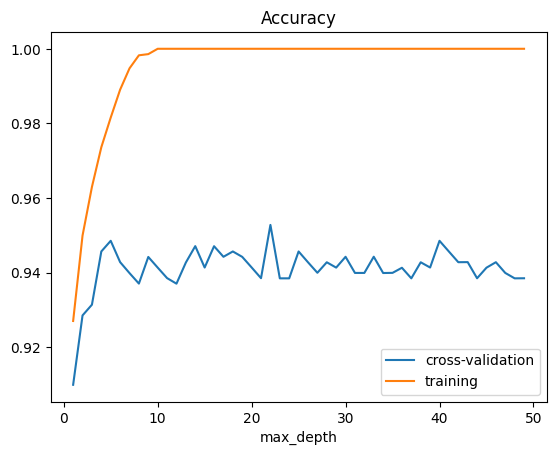

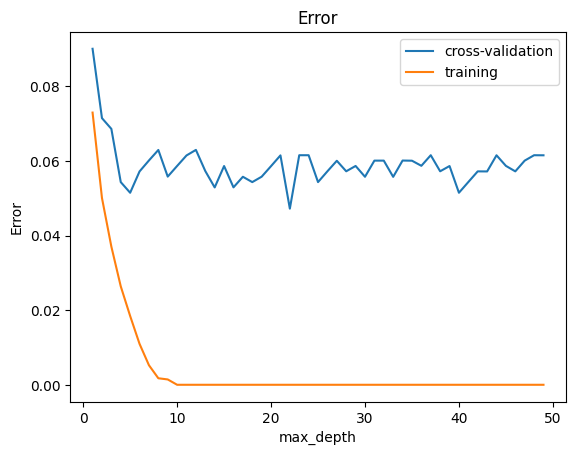

In [62]:
# max_depth
nrange = range(1,50)
clf = tree.DecisionTreeClassifier()
train_scores , validation_scores = validation_curve(clf, df.loc[:,df.columns!='Class'],df['Class'], param_name='max_depth', param_range=nrange, cv=10)

plt.title('Cross Validation max_depth accuracy')
plt.plot(nrange, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(nrange, train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.xlabel('max_depth')
plt.title("Accuracy")
plt.show()

plt.figure()
plt.plot(nrange, 1 - validation_scores.mean(axis=1), label='cross-validation')
plt.plot(nrange, 1- train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.title("Error") 
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.show()



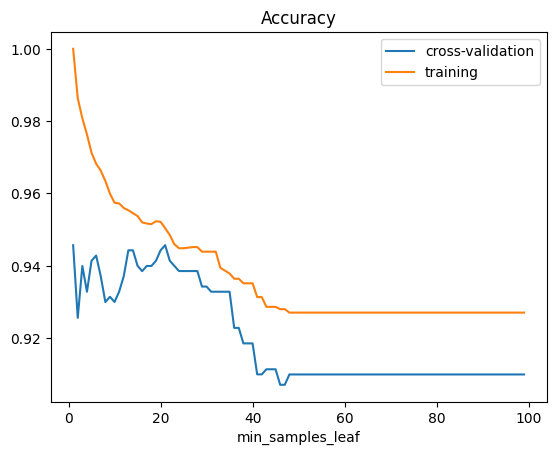

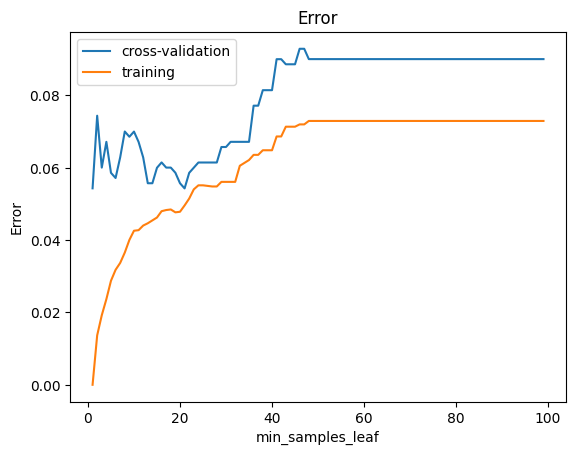

In [63]:
# min_samples_leaf
nrange = range(1,100)
clf = tree.DecisionTreeClassifier()
train_scores , validation_scores = validation_curve(clf, df.loc[:,df.columns!='Class'],df['Class'], param_name='min_samples_leaf', param_range=nrange, cv=10)

plt.title('Cross Validation min_samples_leaf accuracy')
plt.plot(nrange, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(nrange, train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.xlabel('min_samples_leaf')
plt.title("Accuracy")
plt.show()

plt.figure()
plt.plot(nrange, 1 - validation_scores.mean(axis=1), label='cross-validation')
plt.plot(nrange, 1- train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.title("Error") 
plt.xlabel('min_samples_leaf')
plt.ylabel('Error')
plt.show()



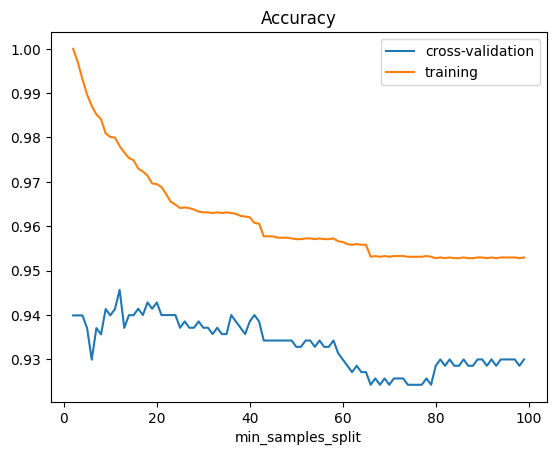

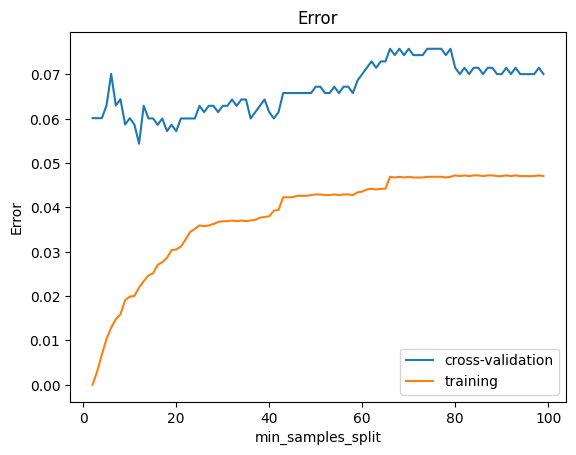

In [64]:
# min samples split
nrange = range(2,100)
clf = tree.DecisionTreeClassifier()
train_scores , validation_scores = validation_curve(clf, df.loc[:,df.columns!='Class'],df['Class'], param_name='min_samples_split', param_range=nrange, cv=10)

plt.title('Cross Validation min_samples_split accuracy')
plt.plot(nrange, validation_scores.mean(axis=1), label='cross-validation') 
plt.plot(nrange, train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.xlabel('min_samples_split')
plt.title("Accuracy")
plt.show()

plt.figure()
plt.plot(nrange, 1 - validation_scores.mean(axis=1), label='cross-validation')
plt.plot(nrange, 1- train_scores.mean(axis=1), label='training') 
plt.legend(loc='best')
plt.title("Error") 
plt.xlabel('min_samples_split')
plt.ylabel('Error')
plt.show()

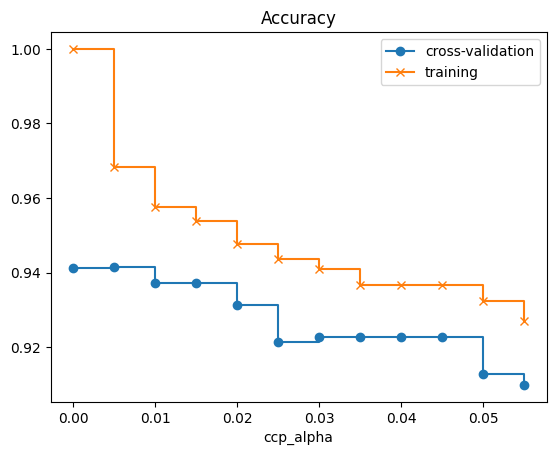

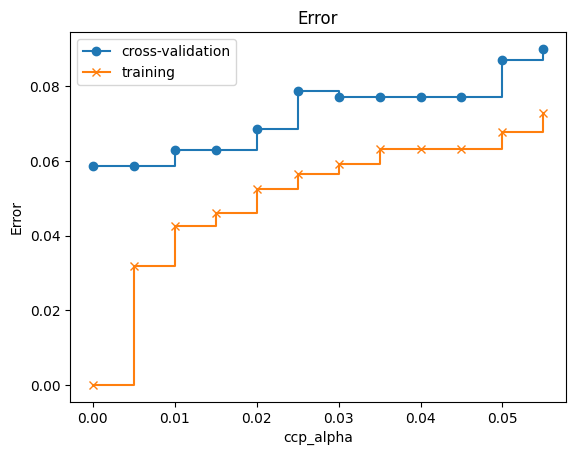

In [65]:
# Pruning - ccp_alpha
nrange = np.arange(0.0,0.06, 0.005)
clf = tree.DecisionTreeClassifier()
train_scores , validation_scores = validation_curve(clf, df.loc[:,df.columns!='Class'],df['Class'], param_name='ccp_alpha', param_range=nrange, cv=10)

plt.title('Cross Validation ccp_alpha accuracy')
plt.plot(nrange, validation_scores.mean(axis=1), label='cross-validation', marker="o", drawstyle="steps-post") 
plt.plot(nrange, train_scores.mean(axis=1), label='training', marker="x", drawstyle="steps-post") 
plt.legend(loc='best')
plt.xlabel('ccp_alpha')
plt.title("Accuracy")
plt.show()


plt.figure()
plt.plot(nrange, 1 - validation_scores.mean(axis=1), label='cross-validation', marker="o", drawstyle="steps-post")
plt.plot(nrange, 1- train_scores.mean(axis=1), label='training', marker="x", drawstyle="steps-post") 
plt.legend(loc='best')
plt.title("Error") 
plt.xlabel('ccp_alpha')
plt.ylabel('Error')
plt.show()

              precision    recall  f1-score   support

           1       0.91      0.97      0.94       106
           2       0.95      0.86      0.90        69

    accuracy                           0.93       175
   macro avg       0.93      0.91      0.92       175
weighted avg       0.93      0.93      0.92       175



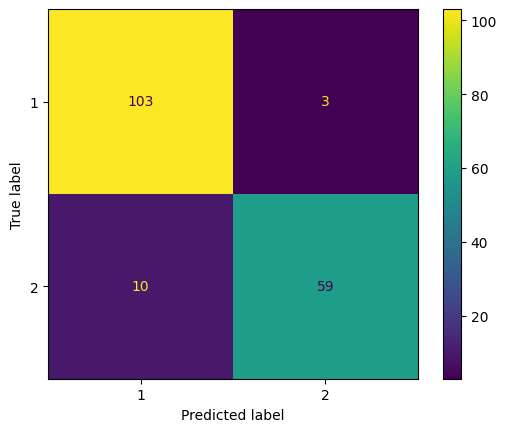

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

clf = tree.DecisionTreeClassifier(min_samples_leaf=1, min_samples_split=2, max_depth=5)
clf.fit(x_train,y_train)
y_pred_test = clf.predict(x_test)

report = classification_report(y_test, y_pred_test)
print(report)

cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

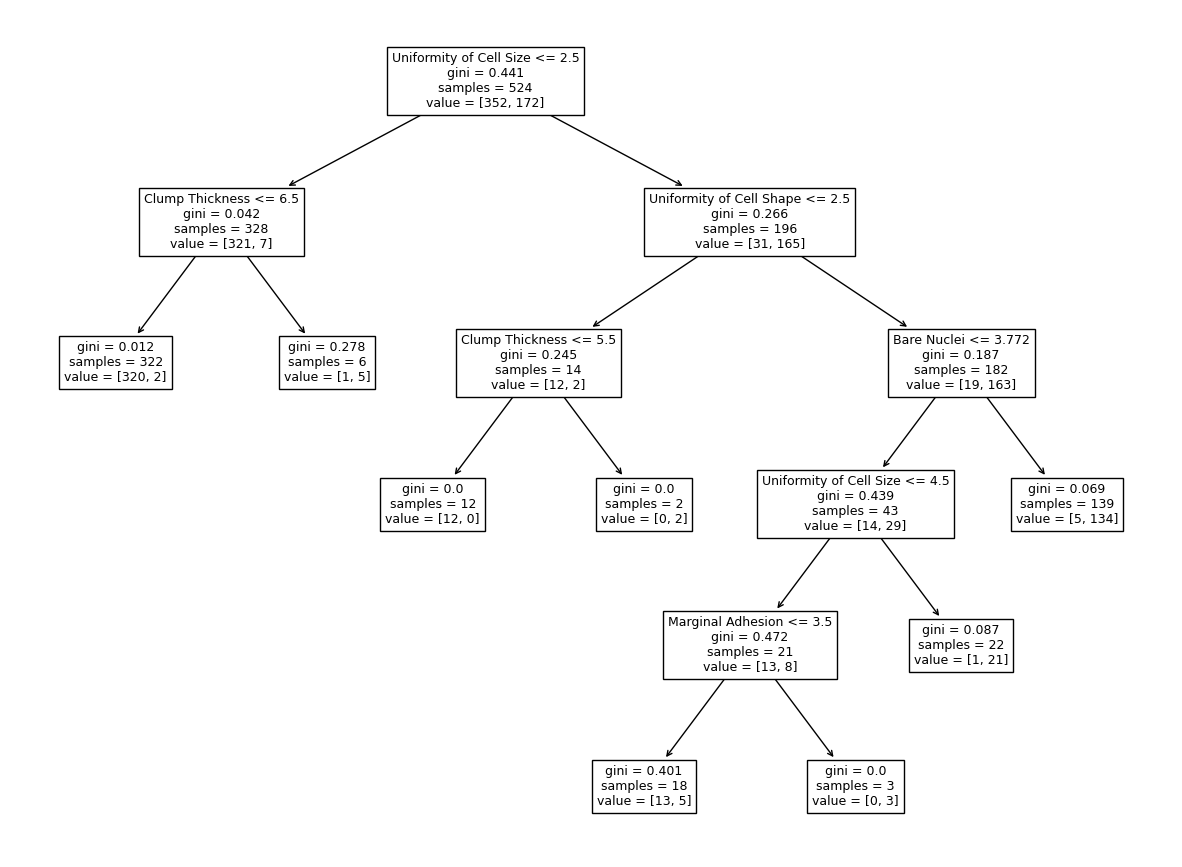

In [73]:
clf = tree.DecisionTreeClassifier(ccp_alpha=0.005, min_samples_leaf=1, min_samples_split=2, max_depth=5)
clf.fit(x_train,y_train)
plt.figure(figsize=(15,11))
tree.plot_tree(clf, feature_names=df.columns)
plt.show()

In [74]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

# for index, feat in enumerate(feature):
#     print(feature[index])
#     print(df.columns[feat])
#     feature[index] = df.columns[feat]

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

        
print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)

for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if {feature} <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=df.columns[feature[i]],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 15 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if Uniformity of Cell Size <= 2.5 else to node 4.
	node=1 is a split node: go to node 2 if Clump Thickness <= 6.5 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if Uniformity of Cell Shape <= 2.5 else to node 8.
		node=5 is a split node: go to node 6 if Clump Thickness <= 5.5 else to node 7.
			node=6 is a leaf node.
			node=7 is a leaf node.
		node=8 is a split node: go to node 9 if Bare Nuclei <= 3.772328019142151 else to node 14.
			node=9 is a split node: go to node 10 if Uniformity of Cell Size <= 4.5 else to node 13.
				node=10 is a split node: go to node 11 if Marginal Adhesion <= 3.5 else to node 12.
					node=11 is a leaf node.
					node=12 is a leaf node.
				node=13 is a leaf node.
			node=14 is a leaf node.


In [69]:
df[['Uniformity of Cell Size',"Clump Thickness", "Marginal Adhesion"]].describe()

,Uniformity of Cell Size,Clump Thickness,Marginal Adhesion
count,699.000000,699.000000,699.000000
mean,3.134478,4.417740,2.806867
std,3.051459,2.815741,2.855379
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000
50%,1.000000,4.000000,1.000000
75%,5.000000,6.000000,4.000000
max,10.000000,10.000000,10.000000


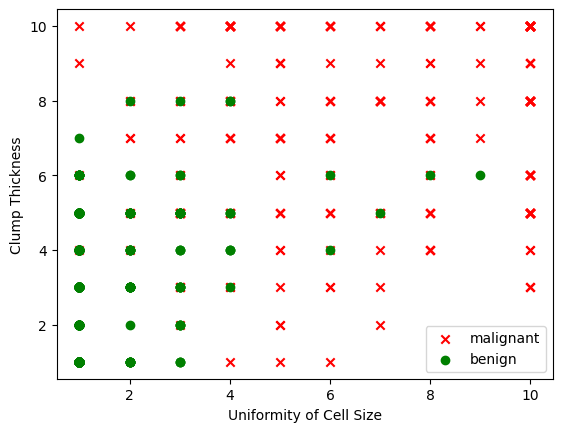

In [70]:
fig, ax = plt.subplots()
malignant = df[df['Class'] == 2]
benign = df[df['Class'] == 1]
ax.scatter(malignant['Uniformity of Cell Size'], malignant['Clump Thickness'], marker='x', color='r', label='malignant')
ax.scatter(benign['Uniformity of Cell Size'], benign['Clump Thickness'], marker='o', color='g', label='benign')
ax.set_xlabel('Uniformity of Cell Size')
ax.set_ylabel('Clump Thickness')
ax.legend()
plt.show()

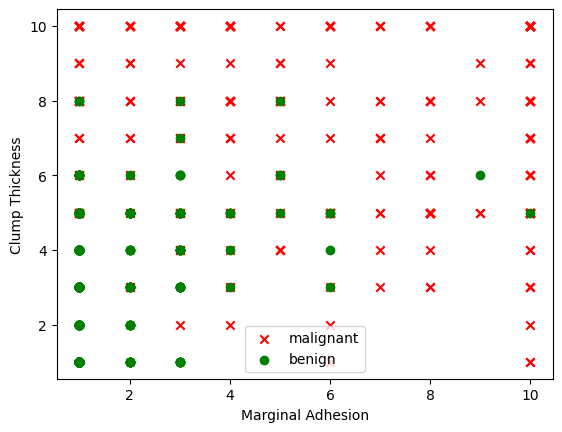

In [71]:
fig, ax = plt.subplots()
malignant = df[df['Class'] == 2]
benign = df[df['Class'] == 1]
ax.scatter(malignant['Marginal Adhesion'], malignant['Clump Thickness'], marker='x', color='r', label='malignant')
ax.scatter(benign['Marginal Adhesion'], benign['Clump Thickness'], marker='o', color='g', label='benign')
ax.set_xlabel('Marginal Adhesion')
ax.set_ylabel('Clump Thickness')
ax.legend()
plt.show()

In [88]:
print(f'Rows with Uniformity of Cell Size bigger than value 4: {len(df[(df["Uniformity of Cell Size"] >= 5)])}') 
print(f'Rows with Uniformity of Cell Size bigger than value 4 and malignant: {len(df[(df["Uniformity of Cell Size"] >= 5) & (df["Class"] == 2)])}')

Rows with Uniformity of Cell Size bigger than value 4: 178
Rows with Uniformity of Cell Size bigger than value 4 and malignant: 173
